In [1]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# The diameter data is courtesy Bill Claff 
# https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBench.htm
description = "JP2019-152887 Example 3 (AF-S Nikkor 400mm f/2.8 E FL ED VR)"
columns = "type roc distance diameter material"
text = """
O    0            20     200.0    AIR
S    1200.3704    10     139.22   1.5168/63.88
S    1199.7897    5      139.22   AIR    
S    207.0795     1      137.22   1.43384/95.26
S    -1127.5309   17.5   137.22   AIR    
S    175.9698     44.9   115.22   1.43384/95.26
S    -397.2708    18     115.22   AIR    
S    -360.2396    3.07   110.72   1.61266/44.46
S    353.1837     6      110.72   AIR    
S    66.4844      90     69.22    1.795/45.32
S    45.9182      4      63.22    1.49782/82.54
S    1114.1067    15     63.22    AIR    
S    2992.5492    18.503 48.22    1.755/52.34
S    118.0399     2.5    46.72    AIR    
S    -241.6942    3.35   46.72    1.84668/23.83
S    -86.4136     3.5    46.72    1.53996/59.52
S    64.2643      2.4    46.72    AIR    
A    0           38.179  37.958   AIR    
S    90.0336      1.5    38.72    1.48749/70.43
S    -63.8039     7.6    38.72    AIR    
S    -65.9768     1.2    36.72    1.84668/23.83
S    -114.8763    1.9    36.72    AIR    
S    300.3587     5      36.72    1.84668/23.83
S    -128.0558    3.5    36.72    1.59319/67.94
S    53.9004      1.9    36.72    AIR    
S    -347.5421    3.1    34.72    1.755/52.33
S    94.5337      1.9    34.72    AIR    
S    118.3533     4.19    33.72   1.7725/49.68
S    -384.3825    3.5    33.72    AIR    
S    67.4622      0.1    34.22    1.64/60.14
S    -340.4206    4.5    34.22    1.84668/23.83
S    246.6417     1.9    34.22    AIR    
S    0            6.5    35.72    1.5168/63.88
S    0            1.5    35.72    AIR    
I    0            74.22  43.26    AIR    
"""

In [3]:
s = ro.system_from_text(text, columns.split(), description=description)
s.object.angle = np.deg2rad(6.28)
s.fields = 0, .7, 1.0

In [4]:
s.update()
print(s)

System: JP2019-152887 Example 3 (AF-S Nikkor 400mm f/2.8 E FL ED VR)
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 6.28 deg
 Pupil:
   Pupil Distance: 1035
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 69.0696
Image:
 Radius: 21.6
 Update Radius: True
 Pupil:
   Pupil Distance: -116.26
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 20.5506
Stop: 17
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S         20        inf        200         basic/air   1.000   1.000   89.30
 1 S         10       1200     139.22                 -   1.517   1.517   63.88
 2 S          5       1200     139.22         basic/air   1.000   1.000   89.30
 3 S          1      207.1     137.22                 -   1.434   1.434   95.26
 4 S       17.5      -1128     137.22         basic/air   1.000   1.000   89.30
 5 S       44.9        176     115.22                 -   1.434   1.434   95.26
 6 S     

AssertionError: 

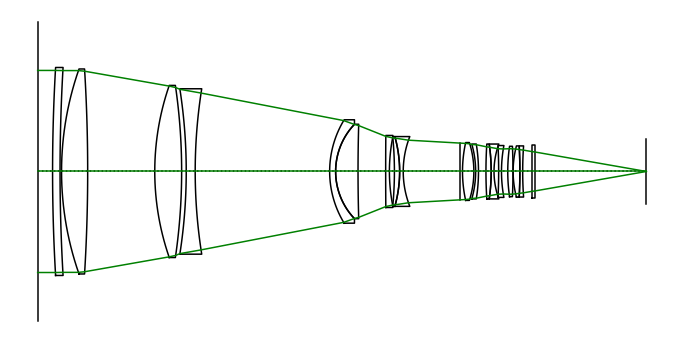

In [5]:
ro.Analysis(s)